In [38]:
from typing import List , TypedDict
from langgraph.graph import StateGraph
import requests

In [39]:
class MyState(TypedDict):
    numbers: List[int]
    result: str
    operator: str

In [40]:
# def subtract(state: MyState)->MyState:
#     values = state['numbers']
#     try:
#         response = requests.post(
#             "http://localhost:8000/subtract",
#             json={"numbers":values}
#         )
#         response.raise_for_status()
#         difference = response.json()["difference"]
#         state['result'] = state['result'] + f" the difference is {difference}"
#     except requests.exceptions.RequestException as e:
#         state['result'] = state['result'] + f" Error calling subtraction API: {str(e)}"
#     return state





In [41]:
# def multiply(state: MyState)->MyState:
#     values = state['numbers']
#     try:
#         response = request.post(
#             "http:localhost:8000/multiply",
#             json={"numbers":values}
#         )
#         response.raise_for_stauts()
#         product = response.json()["prodcut"]
#         state['result'] = state['result'] + f" The prodcut is {product}"
#     except requests.exceptions.RequestException as e:
#         state['result'] = state['result'] + f" Error calling multiplication API: {str(e)}"
#     return state





In [42]:
def condNode(state: MyState)->MyState:
    if state['operator'] == '+':
        values = state['numbers']
        try:
            response = requests.post(
                "http://localhost:8000/add",
                json={"numbers":values}
            )
            response.raise_for_status()
            total = response.json()["total"]
            state['result'] = state['result'] + f" The sum is {total}"
        except requests.exceptions.RequestException as e:
            state['result'] = state['result'] + f" Error calling addition API: {str(e)}"
    elif state['operator'] == '-':
        values = state['numbers']
        try:
            response = requests.post(
                "http://localhost:8000/subtract",
                json={"numbers":values}
            )
            response.raise_for_status()
            difference = response.json()["difference"]
            state['result'] = state['result'] + f" the difference is {difference}"
        except requests.exceptions.RequestException as e:
            state['result'] = state['result'] + f" Error calling subtraction API: {str(e)}"
    elif state['operator']=='*':
        values = state['numbers']
        try:
            response = requests.post(
                "http://localhost:8000/multiply",
                json={"numbers":values}
            )
            response.raise_for_status()
            product = response.json()["product"]
            state['result'] = state['result'] + f" The product is {product}"
        except requests.exceptions.RequestException as e:
            state['result'] = state['result'] + f" Error calling multiplication API: {str(e)}"
    else:
        state['result'] = state['result'] + " Invalid operator"
    return state

In [43]:
graph = StateGraph(MyState)


In [44]:
graph.add_node("cond" , condNode)

In [45]:
graph.set_entry_point("cond")
graph.set_finish_point("cond")

In [46]:
app = graph.compile()

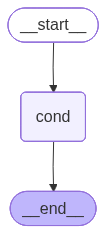

In [47]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [48]:
data = {
    "numbers":[1,2,3,4,5],
    "operator":"*",
    "result":""
}


In [49]:
result = app.invoke(data)

In [50]:
print(result)

{'numbers': [1, 2, 3, 4, 5], 'result': ' The product is 120', 'operator': '*'}
